# Detecting Traveling Ionospheric Disturbances (TIDs) During the 2012 Haida – Gwaii Earthquake

This notebook demostrates how deep learning - specifically Convolutional Neural Networks (CNNs) - can be used to detect signs of tsunami waves in the Earth's ionosphere (Traveling Ionospheric Disturbances, or TIDs), and accompanies the paper **Detecting Tsunami-related Internal Gravity Waves in Earth's Ionosphere with Convolutional Neural Networks**. 

To replicate the experiment detailed in the paper, run the below cells without modification to the `Model` or `Experiment` parameters except for `Experiment.name`. Check out the source code in the `tidd` directory to get a better understanding of the approach and the out of sample validation process. 

## Imports

First, we'll import the libraries we need to run the experiment and replicate the paper results. 

In [1]:
import json
from fastai.vision.all import Adam, resnet34

from tidd.model import Model, Experiment

## Define Model

At this stage, we can define the model to be used in model training and later to perform inference as part of the 

In [2]:
M = Model(
    architecture=resnet34,
    batch_size=256,
    learning_rate=0.0001,
    optimization_function=Adam
)

## Define Experiment

In [3]:
E = Experiment(
    model=M,
    name="tidd-test",
    cuda_device=3,
    training_data_path="../data/experiments/proof_of_concept/hawaii/train",
    validation_data_path="../data/experiments/proof_of_concept/hawaii/validation",
    test_percent=0.2,
    parallel_gpus=False,
    max_epochs=50
)

{ device_name: Tesla P100-SXM2-16GB }
{ parallel_gpus: False }
{ data_path_train: ../data/experiments/proof_of_concept/hawaii/train }
{ batch_size: 256 }
{ architecture: <function resnet34 at 0x79f090255048> }
{ learning_rate: 0.0001 }
{ epochs_max: 50 }
Better model found at epoch 0 with valid_loss value: 0.41977450251579285.
Better model found at epoch 1 with valid_loss value: 0.19943898916244507.
Better model found at epoch 2 with valid_loss value: 0.03800802677869797.
Better model found at epoch 3 with valid_loss value: 0.03654007241129875.
Epoch 4: reducing lr to 1e-05
Better model found at epoch 4 with valid_loss value: 0.015853647142648697.
Epoch 6: reducing lr to 1.0000000000000002e-06
No improvement since epoch 4: early stopping
| accuracy:   0.995774 |
| precision:   0.960619 |
| recall:   0.963329 |
| F1 Score:   0.961972 |
| anomaly coverage:   0.918425 |
| normal coverage:   0.990801 |
Saving File of:  mkea__G07
Saving File of:  npoc__G20
Saving File of:  pat2__G07
Saving 

In [4]:
# load in ground truth labels for validation of results 
with open("/home/vconstan/projects/tidd/data/experiments/proof_of_concept/hawaii/tid_start_finish_times.json", "rb") as f_in:
    ground_truth = json.load(f_in)

In [5]:
ground_truth

{'302': {'G04': {'start': 31400, 'finish': 33200},
  'G07': {'start': 31160, 'finish': 32960},
  'G08': {'start': 31900, 'finish': 33700},
  'G10': {'start': 29900, 'finish': 31700},
  'G20': {'start': 31150, 'finish': 32950}}}

## Run Experiment

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.563426,0.419775,0.068634,0.931366,02:22
1,0.155615,0.199439,0.026295,0.973705,02:20
2,0.061409,0.038008,0.006261,0.993739,02:19
3,0.061651,0.036540,0.007669,0.992331,02:19
4,0.027404,0.015854,0.004226,0.995774,02:19
5,0.016135,0.019258,0.002191,0.997809,02:19
6,0.006022,0.020021,0.002504,0.997496,02:19
7,0.004497,0.016743,0.002035,0.997965,02:19


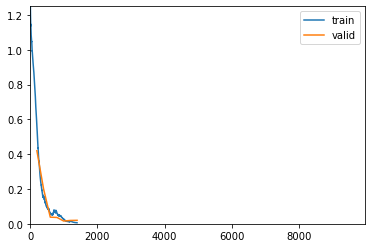

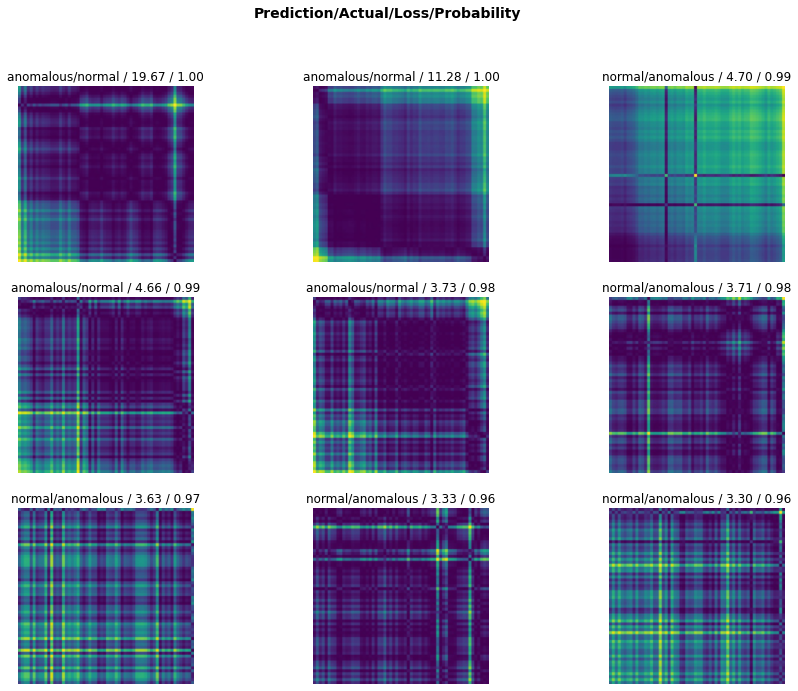

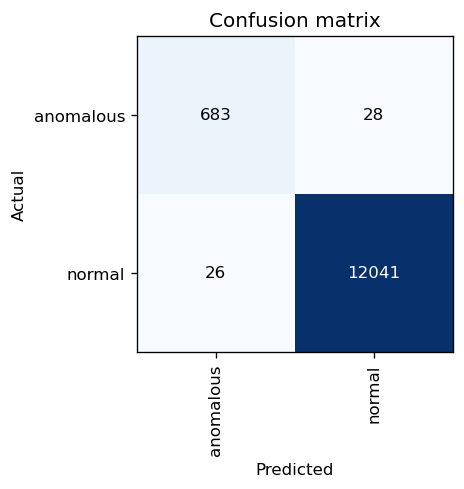

In [6]:
E.run(
    ground_truth_labels=ground_truth, 
    verbose=True,
    save_path="/home/vconstan/projects/tidd/output"
)